# Cryptocurrency Market Analysis with Unsupervised Learning Methods

In the world of cryptocurrency market, traditional technical analysis (TA) is a method for studying historical price charts and trading volume data to identify potential trade opportunity. However, due to the inherent volatility and non-linear relationships within the market, traditional methods often fall short.

Rather than learning a mapping from input to output, the goal of unsupervised learning is to describe or understand the structure of the data. This project aims to employ unsupervised learning methods to extract insights from historial cryptocurrency data. 

All resources in this project has been uploaded to my GitHub repo: https://github.com/zac4j/crypto-market-analysis (unsupervised learning folder)

## Data Preparetion

### Data Description

I will use the [5 Years of Crypto Data](https://www.kaggle.com/datasets/mjdskaggle/5-years-of-crypto-data-as-of-632024) dataset. This dataset contains the historical price information of some of the top crypto currencies by market capitalization. Price history is from 5 years ago to **June 03, 2024**.

|Factor |	Description|
|:---------|:-------------|
|Date |	Date of observation|
|Open |	Opening price on the given day|
|High |	Highest price on the given day|
|Low  |	Lowest price on the given day|
|Close | Closing price on the given day|
|Volumn| Volume of transactions on the given day|

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5-years-of-crypto-data-as-of-632024/ETH-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/BCH-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/XRP-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/SOL-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/DOGE-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/USDT-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/BTC-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/XMR-USD.csv
/kaggle/input/5-years-of-crypto-data-as-of-632024/BNB-USD.csv


### Data Initialization

Loading and Previewing Bitcoin Historical Price Data

In [2]:
import seaborn as sns
import os
import glob  # Import glob to collect file names and use a list to store DataFrames.
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import linregress
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
import plotly.express as px
from matplotlib.colors import rgb2hex

%matplotlib inline

# Loading the CSV files from the specified directory
files = glob.glob("/kaggle/input/*/*.csv")

# Create dict to store the Crypto DataFrames
dfs = {}

for file in files:
    # Extract the file name (without extension) to use as the DataFrame key
    key = os.path.basename(file).split(".")[0].replace('-USD', '')
    key

    df = pd.read_csv(
        file,
        parse_dates=['Date'],
        index_col='Date'
    )
    
    df.insert(0, 'Symbol', key)
    
    # Drop unnecessary column
    df.drop(columns=['Adj Close'],inplace=True)
    
    # Store each crypto to the dict
    dfs[key] = df

all_df = pd.concat(dfs.values(), ignore_index=True)

### Display Data Frame Information

In [3]:
display(Markdown(f"### DataFrame "))
display(all_df.head())
all_df.info()

### DataFrame 

,Symbol,Open,High,Low,Close,Volume
0,ETH,270.088562,270.334106,251.262192,252.607925,9375712917
1,ETH,252.511642,252.511642,236.127213,241.338791,10132549747
2,ETH,241.497040,248.138138,239.983459,247.051010,8548917062
3,ETH,246.925247,249.944504,238.501114,249.474335,8265146806
4,ETH,249.335281,254.352295,246.597900,250.930359,8379534528


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16140 entries, 0 to 16139
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  16140 non-null  object 
 1   Open    16140 non-null  float64
 2   High    16140 non-null  float64
 3   Low     16140 non-null  float64
 4   Close   16140 non-null  float64
 5   Volume  16140 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 756.7+ KB


Based on the above information, we can observe the following attributes of the DataFrame:

- It contains non-null values, guaranteed data integrity.
- The Symbol column is the cryptocurrency symbol.
- The other columns are numeric values:
  - **Open**: Indicates the opening price of the Bitcoin for the given day in USD.
  - **High**: Indicates the highest price of the Bitcoin for the given day in USD.
  - **Low**: Indicates the lowest price of the Bitcoin for the given day in USD.
  - **Close**: Indicates the closing price of the Bitcoin for the given day in USD.
  - **Volume**: Represents the volume of the Bitcoin for the given day.

## Data Cleaning

### Data Format Consistent Check

In [4]:
def check_format_consistent(df: DataFrame) -> None:
    """
    Check and display format consistent for a given DataFrame.

    Parameters:
        df: A given DataFrame.

    """
    display(Markdown("### Data Format Consistent:"))
    # Check data types
    display(Markdown(f"- Data Types: {df.dtypes}"))
    # Check for missing values
    display(Markdown(f"- Null Values: {df.isna().sum()}"))
    # Check for unique values
    display(Markdown(f"- Unique Values: {df.nunique()}"))

check_format_consistent(all_df)

### Data Format Consistent:

- Data Types: Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

- Null Values: Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

- Unique Values: Symbol        9
Open      15558
High      15654
Low       15555
Close     15563
Volume    16138
dtype: int64

Based on the above observation, we see the DataFrame have a consistent format.

### Outlier Detection

Outliers in financial data, especially crypto, can be caused by various factors such as market manipulation, technical glitches, extreme market conditions.

We'll use the Interquartile Range (IQR) method to identify outliers in each column of your dataset. This method is robust to outliers and is commonly used for outlier detection.

In [5]:
def detect_outlier_iqr(df: DataFrame) -> dict:
    """Detects outliers in each column of a DataFrame using IQR.

    Args:
        data: The DataFrame containing the data.

    Returns:
        A DataFrame with a boolean mask indicating whether each value is an outlier.
    """
    
    outlier_info = {}
    # Pick numerical columns
    num_cols = df.select_dtypes(include=['number']).columns

    # Initialize outlier data frames
    num_outliers = {}
    pct_outliers = {}

    for col in num_cols:
        # Get quartiles and IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Count the number of outliers
        num_outliers[col] = ((df[col] > upper_bound) | (df[col] < lower_bound)).sum()

        # Compute the percentage of outliers
        percentage = (num_outliers[col] / len(df[col])) * 100
        pct_outliers[col] = "{:.2f}%".format(percentage)

    outlier_info = {
        'number_outliers': num_outliers,
        'percent_outliers': pct_outliers
    }
    return outlier_info

all_num_outliers = {}
all_pct_outliers = {}
for key, df in dfs.items():
    outlier_info = detect_outlier_iqr(df)
    all_num_outliers[key] = outlier_info['number_outliers']
    all_pct_outliers[key] = outlier_info['percent_outliers']

df_num_outlier = pd.DataFrame(all_num_outliers).T
df_pct_outlier = pd.DataFrame(all_pct_outliers).T
display(Markdown(f"### Numerical Outliers DataFrame "))
display(df_num_outlier)

display(Markdown(f"### Percentage Outliers DataFrame "))
display(df_pct_outlier)    

### Numerical Outliers DataFrame 

,Open,High,Low,Close,Volume
ETH,0,0,0,0,85
BCH,40,43,34,39,36
XRP,85,99,76,85,187
SOL,28,30,29,27,64
DOGE,54,53,43,53,202
USDT,304,232,259,323,74
BTC,0,0,0,0,76
XMR,52,57,47,52,264
BNB,0,0,0,0,115


### Percentage Outliers DataFrame 

,Open,High,Low,Close,Volume
ETH,0.00%,0.00%,0.00%,0.00%,4.65%
BCH,2.19%,2.35%,1.86%,2.13%,1.97%
XRP,4.65%,5.42%,4.16%,4.65%,10.23%
SOL,1.85%,1.98%,1.91%,1.78%,4.22%
DOGE,2.95%,2.90%,2.35%,2.90%,11.05%
USDT,16.63%,12.69%,14.17%,17.67%,4.05%
BTC,0.00%,0.00%,0.00%,0.00%,4.16%
XMR,2.84%,3.12%,2.57%,2.84%,14.44%
BNB,0.00%,0.00%,0.00%,0.00%,6.29%


From the above outlier detection results, we can observe that:
- The percentage of USDT outlier for Volumn is significant lower than the percentage of outliers for OHLC, this is exactly the opposite of other coins. Also as we know the USDT (Tether) is a stablecoin pegged to the US dollar, we can remove it in some comparisons.
- The percentage of BTC, ETH, BNB outliers for OHLC is 0%, this suggest these coins price are relatiely stable and within expected ranges.
- Base on above obervation, all numberical features have outliers, however, at this moment, I prefer to retain the outliers, because employ new Volume value may introduce bias for the prices.

## Exploratory Data Analysis

### Correlation of Features

The most correlated feature pair is ('Open', 'High'), with the value of 0.9997202937519357 


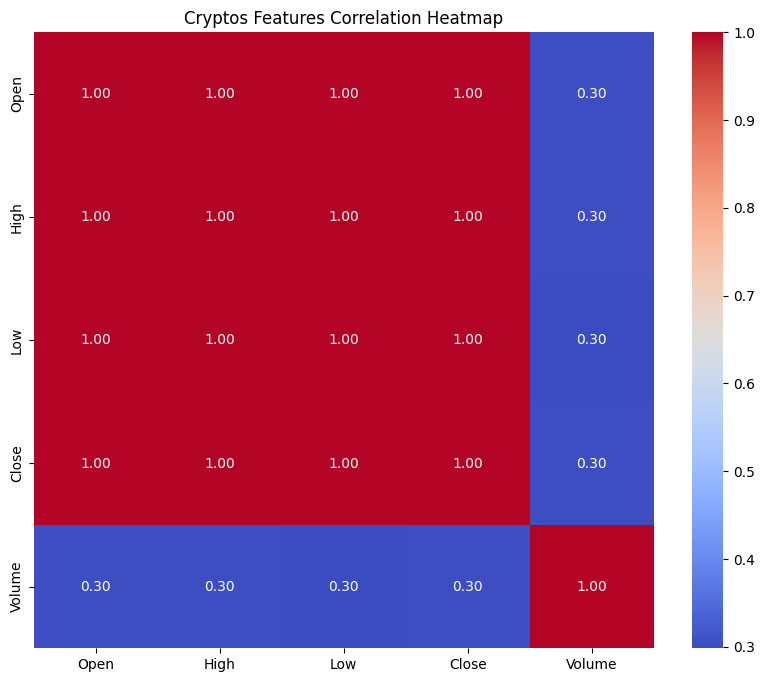

In [6]:
def display_correlation_heatmap(df: DataFrame):
    # Pick numerical data
    numeric_data = df.select_dtypes(include=[np.number])
    # Get features correlation
    corr_matrix = numeric_data.corr()

    # Find the most correlated pair features
    corr_matrix_value = corr_matrix.mask(corr_matrix == 1.0).stack().idxmax()
    print(f'The most correlated feature pair is {corr_matrix_value}, with the value of {corr_matrix.loc[corr_matrix_value]} ')

    # Plot correlation heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
    plt.title('Cryptos Features Correlation Heatmap')
    plt.show()

display_correlation_heatmap(all_df)

From the correlation heatmap of cryptocurrency features, we observe that OHLC features are exhibit a strong positive correlation. When the price of one cryptocurrency moves, the others tend to move in the same direction, providing insights into the market sentiment for that specific portion of cryptocurrencies.

### OHLC Price Analysis

OHLC stands for Open, High, Low, Close. These four data points represent the price behavior of a cryptocurrency within a specific timeframe (e.g., 1 day). By analyzing these values, traders can gain insights into market trends, volatility, and potential trading opportunities. The price analysis has below importance:

- **Identifying Trends**: Comparing opening and closing prices can help identify upward (bullish) or downward (bearish) trends.
- **Recognizing Price Patterns**: OHLC data is used to create candlestick charts, which reveal various patterns like dojis, hammers, and engulfing patterns. These patterns can provide clues about market sentiment and potential price movements.
- **Determining Support and Resistance Levels**: By analyzing high and low prices over time, traders can identify price levels where buying (support) or selling (resistance) pressure is strong.
- **Measuring Volatility**: The difference between high and low prices indicates price volatility during a specific period.



#### Price Movements and Trends


In [7]:
def plot_close_price(data:dict):
    # Define a color palette for the features
    palette = sns.color_palette('Paired', n_colors=len(data))
    hex_palette = [rgb2hex(color) for color in palette]
    fig = go.Figure()

    # Function to create and show plots for a given feature
    for (name, df), color in zip(data.items(), hex_palette):
        fig.add_trace(go.Scatter(x=df.index, y=df.Close, mode='lines', name=name, line=dict(color=color)))
    
    fig.update_layout(
            title="Cryptocurrencies Close Price Over Time",
            xaxis_title='Date',
            yaxis_title='Price',
            template='plotly_dark',
            autosize=True,
            height=600,
        )
        
    fig.show()

plot_close_price(dfs)

The chart shows the price changes of top cryptocurrencies from 2019 to 2024. Here are the observations:

- BTC shows the most significant and consistent growth over the period, with a major spike in early 2024 reaching around $73,000.
- ETH demonstrates substantial growth, particularly from 2020 onwards, with a peak coinciding with Bitcoin's in late 2021.
- SOL shows notable price increases in the latter part of the chart, though not to the same extent as Bitcoin and Ethereum.
- Most other cryptocurrencies show relatively flat price movements until 2020-2021, when many experienced significant price increases.
- The chart illustrates the volatile nature of cryptocurrency markets, with dramatic price fluctuations, especially in the 2020-2022 period.
- The overall trend suggests a major crypto market bull run in 2020-2021, followed by a sharp decline for most currencies.
- Stablecoins like USDT appear as a flat line near the bottom, consistent with their design to maintain a steady value.



#### Relationship between opening and closing price

In [8]:
from scipy.stats import linregress
import plotly.express as px

# Calculate given features regression statistics
def calculate_regression_stats(x, y):
    """
    Calculate regression statistics for the given data.

    This function computes the slope, intercept, coefficient of determination (R-squared),
    p-value, and standard error of the regression line for the provided x and y data.

    Parameters:
    x (array-like): The independent variable data.
    y (array-like): The dependent variable data.

    Returns:
    dict: A dictionary containing the following keys and their corresponding values:
        - 'slope': The slope of the regression line.
        - 'intercept': The intercept of the regression line.
        - 'r_squared': The coefficient of determination (R-squared) value.
        - 'p_value': The p-value for the slope.
        - 'std_err': The standard error of the regression line.
    """
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_err': std_err
    }

# Define meaningful pairs of numerical features
features = [('Open', 'Close')]

top_coins = ['BTC', 'ETH', 'SOL']

# Create scatter plots for each pair of numerical features for each selected coin
for coin in top_coins:
    for feature_x, feature_y in features:
        # Filter data for the specific coin
        coin_data = dfs[coin].loc[:,[feature_x,feature_y]]

        # Create scatter plot
        fig = px.scatter(
            coin_data, x=feature_x, y=feature_y, title=f'{feature_x} vs {feature_y} ({coin})',
            labels={feature_x: feature_x, feature_y: feature_y},
            template='plotly_dark', opacity=0.5
        )

        # Calculate regression statistics
        stats = calculate_regression_stats(coin_data[feature_x], coin_data[feature_y])

        # Conditionally add the regression line if R² is above a threshold and p-value is below a threshold
        if stats['r_squared'] > 0.5 and stats['p_value'] < 0.05:
            fig.add_trace(
                go.Scatter(
                    x=coin_data[feature_x], y=stats['slope']*coin_data[feature_x] + stats['intercept'],
                    mode='lines', name=f"y = {stats['slope']:.2f}x + {stats['intercept']:.2f}",
                    line=dict(color='red')
                )
            )
        else:
            print(f"The relationship between {feature_x} and {feature_y} for {coin} is not significant.")

        fig.show()


We can observe a positive linear relationship between the opening price (‘Open’) and the closing price (‘Close’) of top cryptocurrencies. As the opening price increases, the closing price tends to increase as well. This suggests that strong opening prices often lead to higher closing prices.

### Volume Analysis

Volume in the cryptocurrency market refers to the total number of coins or tokens traded within a specific timeframe, typically a day. It's a crucial metric for understanding market sentiment, price trends, and potential investment opportunities. The volume analysis has below importance:

- **Confirms Price Trends**:
High volume accompanying an upward price movement indicates strong buying pressure, suggesting a potential continuation of the uptrend. Conversely, declining volume during an uptrend might signal weakening momentum.   
- **Identifies Potential Reversals**:
A significant increase in volume during a downtrend can sometimes indicate a potential reversal, as it might signify a large number of buyers entering the market.
- **Measures Market Liquidity**:
High volume generally indicates a liquid market, making it easier to buy or sell large quantities of a cryptocurrency without significantly impacting the price.   
- **Detects Market Manipulation**
Unusual volume spikes can sometimes be indicative of market manipulation or pump-and-dump schemes.



### Volume correlation across the coins

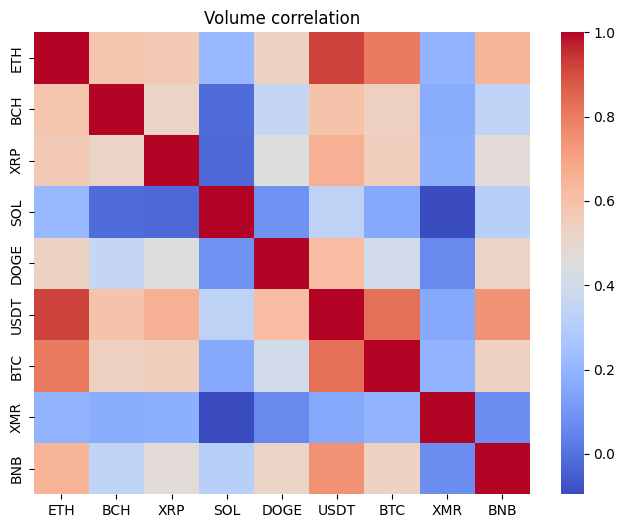

Number of pairs with low correlation (|correlation| < 0.3): 13
Number of pairs with medium correlation (0.3 ≤ |correlation| < 0.7): 19

Pair with the strongest correlation:
  Pair 1 Pair 2  Correlation
4    ETH   USDT     0.921573


In [9]:
vol_corr_matrix = pd.DataFrame({key: df['Volume'] for key, df in dfs.items()}).corr()

# Plot correlation matrix for 'Volume'
plt.figure(figsize=(8, 6))
sns.heatmap(vol_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Volume correlation')
plt.show()

# Set thresholds for low, medium, and high correlation
low_corr_threshold = 0.3
medium_corr_threshold_low = 0.3
medium_corr_threshold_high = 0.7

# Find pairs with low correlation without duplication
low_corr_pairs = (vol_corr_matrix.mask(vol_corr_matrix == 1.0)
                  .stack()
                  .reset_index()
                  .rename(columns={'level_0': 'Pair 1', 'level_1': 'Pair 2', 0: 'Correlation'})
                  .query('abs(Correlation) < @low_corr_threshold and `Pair 1` < `Pair 2`'))

# Find pairs with medium correlation without duplication
medium_corr_pairs = (vol_corr_matrix.mask(vol_corr_matrix == 1.0)
                     .stack()
                     .reset_index()
                     .rename(columns={'level_0': 'Pair 1', 'level_1': 'Pair 2', 0: 'Correlation'})
                     .query('@medium_corr_threshold_low <= abs(Correlation) < @medium_corr_threshold_high and `Pair 1` < `Pair 2`'))

# Find the pair with the strongest correlation
strongest_corr_pair = (vol_corr_matrix.mask(vol_corr_matrix == 1.0)
                       .stack()
                       .reset_index()
                       .rename(columns={'level_0': 'Pair 1', 'level_1': 'Pair 2', 0: 'Correlation'})
                       .query('`Pair 1` < `Pair 2`')
                       .sort_values(by='Correlation', ascending=False)
                       .head(1))

# Print the count of low and medium correlation pairs
print("Number of pairs with low correlation (|correlation| < {}): {}".format(low_corr_threshold, low_corr_pairs.shape[0]))
print("Number of pairs with medium correlation ({} ≤ |correlation| < {}): {}".format(medium_corr_threshold_low, medium_corr_threshold_high, medium_corr_pairs.shape[0]))

print("\nPair with the strongest correlation:")
print(strongest_corr_pair)

We can observe that there is a strong positive correlation in trading volume between ETH and USDT suggests that they generally have similar levels of liquidity and market activity. However, differences may exist in the magnitude of volume, market depth, and other market dynamics between the two cryptocurrencies.

### Volatility Analysis

In [10]:
# Calculate daily returns for each cryptocurrency
for df in dfs.values():
    df['return'] = df['Close'].pct_change()

# Calculate Volatility and Sharpe ratio for each DataFrame
volatility = {key: df['return'].std() for key, df in dfs.items()}
annual_volatility = {key: volatility[key] * np.sqrt(252) for key in volatility}
sharp_ratio = {key: (np.mean(df['return']) * 252 - 0.03) / annual_volatility[key] for key, df in dfs.items()}

# Create a DataFrame from calculated values
data = {
    'Name': list(dfs.keys()), 
    'Volatility': list(volatility.values()), 
    'Annual Volatility': list(annual_volatility.values()), 
    'Sharp': list(sharp_ratio.values())
}
volatility_df = pd.DataFrame(data)

# Convert seaborn palette to hex
palette = sns.color_palette('Paired', len(volatility_df))
hex_palette = [f"rgb({int(r*255)},{int(g*255)},{int(b*255)})" for r, g, b in palette]

# Plotly bar plot for Annual Volatility
fig_volatility = go.Figure(
    data=[
        go.Bar(
            x=volatility_df['Name'], 
            y=volatility_df['Annual Volatility'], 
            marker=dict(color=hex_palette)
        )
    ]
)
fig_volatility.update_layout(
    title='Volatility for each coin',
    xaxis_title='Coin',
    yaxis_title='Annual Volatility',
    template='plotly_dark'
)
for i, v in enumerate(volatility_df['Annual Volatility']):
    fig_volatility.add_annotation(
        x=volatility_df['Name'][i], 
        y=v, 
        text=f"{v:.2f}", 
        showarrow=False, 
        font=dict(color='white')
    )
fig_volatility.show()

# Plotly bar plot for Sharpe ratio
fig_sharpe = go.Figure(
    data=[
        go.Bar(
            x=volatility_df['Name'], 
            y=volatility_df['Sharp'], 
            marker=dict(color=hex_palette)
        )
    ]
)
fig_sharpe.update_layout(
    title='Sharp ratio for each coin',
    xaxis_title='Coin',
    yaxis_title='Sharp Ratio',
    template='plotly_dark'
)
for i, v in enumerate(volatility_df['Sharp']):
    fig_sharpe.add_annotation(
        x=volatility_df['Name'][i], 
        y=v, 
        text=f"{v:.2f}", 
        showarrow=False, 
        font=dict(color='white')
    )
fig_sharpe.show()

The Sharp ratio evaluates the performance of an investment relative to its risk level. It quantifies the relationship between the returns generated by an asset and the associated volatility, indicating whether the returns are attributable to investment skill or simply reflect increased risk. In the above analysis, BNB, SOL, ETH as the top investment choices based on their favorable risk-return profiles.

## Feature Engineering

Create relevant features from the dataset. This may include:

- Price changes (open-close, high-low)
- Moving averages (e.g., 50-day, 200-day)
- Volatility indicators (e.g., Bollinger Bands, Standard Deviation)
- Momentum indicators (e.g., RSI, MACD)

In [11]:
RSI_TIME_WINDOW = 14  # number of days
MA_WINDOWS = [50, 100, 200] # moving averages of days
crypto_df = []
updated_df = {}

# Function to compute SMA
def compute_sma(data, window):
    return data.rolling(window=window).mean()

# Function to compute RSI
def compute_rsi(data: pd.Series, time_window: int) -> pd.Series:
    """
    Compute the Relative Strength Index (RSI) for a given data series.

    Parameters:
        data (pd.Series): The data series to compute the RSI for.
        time_window (int): The window size to use for the RSI calculation.

    Returns:
        pd.Series: The computed RSI values.
    """
    # Ensure that there are enough data points for the RSI calculation.
    if len(data) <= time_window:
        return pd.Series([np.nan] * len(data), index=data.index)

    # Calculate price differences and positive/negative changes
    diff = data.diff(1).fillna(0)
    up_chg = np.where(diff > 0, diff, 0)
    down_chg = np.where(diff < 0, -diff, 0)

    # Compute exponential moving averages
    up_chg_avg = pd.Series(up_chg).ewm(span=time_window, adjust=False).mean()
    down_chg_avg = pd.Series(down_chg).ewm(span=time_window, adjust=False).mean()

    # Avoid division by zero and calculate RSI
    with np.errstate(divide='ignore', invalid='ignore'):
        rs = np.where(down_chg_avg != 0, up_chg_avg / down_chg_avg, np.nan)

    rsi = 100 - 100 / (1 + rs)
    return rsi

# Function to add Golden Cross and Death Cross signals
def add_cross_signals(data, short_window=50, long_window=200):
    # Calculate moving averages
    data[f'sma_{short_window}'] = compute_sma(data['Close'], short_window)
    data[f'sma_{long_window}'] = compute_sma(data['Close'], long_window)

    # Calculate Golden and Death cross
    data['Golden_Cross'] = np.where(data[f'sma_{short_window}'] > data[f'sma_{long_window}'], 1, 0)
    data['Death_Cross'] = np.where(data[f'sma_{short_window}'] < data[f'sma_{long_window}'], 1, 0)
    return data

def data_preprocessing(crypto_names, start_date="2021-01-01", rsi_time_window=14, overbought_level=70, oversold_level=30) -> list[pd.DataFrame]:
    """
    Preprocess multiple DataFrames into a single DataFrame.

    Parameters:
        crypto_names (list): List of cryptocurrency names.
        start_date (str): Start date for filtering data.
        rsi_time_window (int): Time window for computing RSI.
        overbought_level (int): RSI level considered as overbought.
        oversold_level (int): RSI level considered as oversold.

    Returns:
        pd.DataFrame: Combined DataFrame with preprocessed data.
    """
    filtered_dfs = []

    for crypto_name in crypto_names:
        df = dfs[crypto_name].query(f"Date > '{start_date}'")
        if df.empty:
            print(f"No data available for {crypto_name} after {start_date}")
            continue
        df = df.loc[~df.index.duplicated()]  # Remove duplicate indices
        df["close_rsi"] = compute_rsi(df['Close'], time_window=rsi_time_window)
        df["high_rsi"] = overbought_level
        df["low_rsi"] = oversold_level

        # Calculate SMA
        for window in MA_WINDOWS:
            df[f'sma_{window}'] = compute_sma(df['Close'], window)

        # Calculate standard deviation
        df['std_20'] = df['Close'].rolling(window=20).std()

        # Calculate bollinger bands
        df['bollinger_upper'] = df['sma_50'] + (df['std_20'] * 2)
        df['bollinger_lower'] = df['sma_50'] - (df['std_20'] * 2)

        # Calculate MACD
        df['ema_12'] = df['Close'].ewm(span=12, adjust=False).mean()
        df['ema_26'] = df['Close'].ewm(span=26, adjust=False).mean()
        df['macd'] = df['ema_12'] - df['ema_26']
        df['signal_line'] = df['macd'].ewm(span=9, adjust=False).mean()
        df['histogram'] = df['macd'] - df['signal_line']

        # Add Golden Cross and Death Cross signals
        df = add_cross_signals(df, 50, 200)

        # Add overbought and oversold signals
        df['Overbought'] = np.where(df['close_rsi'] >= overbought_level, 1, 0)
        df['Oversold'] = np.where(df['close_rsi'] <= oversold_level, 1, 0)

        filtered_dfs.append(df)
        updated_df[crypto_name] = df

    return filtered_dfs

def create_crypto_buttons(crypto_names, count_per_crypto=8):
    """
    Generates date range buttons and visibility buttons for a list of cryptocurrencies.

    Parameters:
    crypto_names (list): A list of cryptocurrency names.

    Returns:
    tuple: A tuple containing two lists:
        - date_buttons (list): A list of dictionaries representing date range buttons.
        - buttons (list): A list of dictionaries representing visibility buttons for each cryptocurrency.
    """
    date_buttons = [
        {'step': "all", 'label': "All time"},
        {'count': 1, 'step': "year", 'stepmode': "backward", 'label': "Last Year"},
        {'count': 2, 'step': "month", 'stepmode': "backward", 'label': "Last 2 Months"},
        {'count': 7, 'step': "day", 'stepmode': "backward", 'label': "Last Week"},
        {'count': 4, 'step': "day", 'stepmode': "backward", 'label': "Last 4 days"},
        {'count': 1, 'step': "day", 'stepmode': "backward", 'label': "Last day"},
    ]
    
    # Initialize the buttons list
    buttons = []

    # Number of cryptocurrencies
    num_crypto = len(crypto_names)

    # Initialize visibility matrix
    vis = [False] * num_crypto * count_per_crypto

    # Generate buttons for each crypto
    for i, crypto_name in enumerate(crypto_names):
        for k in range(count_per_crypto):
            vis[i * count_per_crypto + k] = True

        buttons.append({
            'label': crypto_name,
            'method': 'update',
            'args': [
                {'visible': vis},
                {'title': f'{crypto_name} Charts and Indicators'}
            ]
        })

        # Reset visibility for next iteration
        vis = [False] * num_crypto * count_per_crypto

    return date_buttons, buttons

# Load data
crypto_names = list(dfs.keys())
crypto_names.sort()
# Find the minimum date among all cryptocurrencies
min_dates = [dfs[crypto_name].index.min() for crypto_name in crypto_names]
START_DATE = min(min_dates).strftime('%Y-%m-%d')
crypto_df = data_preprocessing(crypto_names, start_date=START_DATE, rsi_time_window=RSI_TIME_WINDOW)

# Plot
def plotchart():
    fig = make_subplots(
    rows=4,
    cols=2,
    shared_xaxes=True,
    specs=[
        [{"rowspan": 2}, {"rowspan": 2}],  # Subplot spanning 2 rows
        [None, None],                      # This row is spanned by the above subplots
        [{}, {}],                          # Regular subplots
        [{"colspan": 1}, {"colspan": 1}],  # Regular subplots
    ],
    subplot_titles=(
        "<b>Candlestick Chart</b>", "<b>Price Chart</b>",
        "<b>Volume Traded</b>", "<b>Relative Strength Index (RSI)</b>",
        "<b>MACD</b>", "<b>Bollinger</b>"
        )
    )

    # Define colors for SMA windows
    sma_colors = ['blue', 'green', 'orange']
    trace_counter = 0

    # Iterate over indices of crypto_df to ensure consistent order
    for i, df in enumerate(crypto_df):
        # Candlestick Chart
        fig.add_trace(go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'],
                                     showlegend=False),
                      row=1, col=1)
        trace_counter += 1

        # Volume Traded
        fig.add_trace(go.Bar(x=df.index,
                             y=df["Volume"],
                             showlegend=False,
                             marker_color='aqua'),
                      row=3, col=1)
        trace_counter += 1

        # Price Chart
        for trace in [
            (go.Scatter, 'Close', 'red', 'none', 4, 'solid'),
            (go.Scatter, 'Low', 'pink', 'tonexty', 2, 'dash'),
            (go.Scatter, 'High', 'pink', 'tonexty', 2, 'dash')
        ]:
            fig.add_trace(trace[0](x=df.index,
                                   y=df[trace[1]],
                                   mode='lines',
                                   fill=trace[3],
                                   showlegend=False,
                                   line=dict(width=trace[4],
                                             color=trace[2],
                                             dash=trace[5])),
                          row=1, col=2)
            trace_counter += 1

        # Relative Strength Index (RSI) (row 3, col 2)
        for trace in [
            (go.Scatter, 'close_rsi', 'aquamarine', 'none', 4, 'solid'),
            (go.Scatter, 'low_rsi', 'aqua', 'tonexty', 2, 'dash'),
            (go.Scatter, 'high_rsi', 'aqua', 'tonexty', 2, 'dash')
        ]:
            fig.add_trace(trace[0](x=df.index,
                                   y=df[trace[1]],
                                   mode='lines',
                                   fill=trace[3],
                                   showlegend=False,
                                   line=dict(width=trace[4],
                                             color=trace[2],
                                             dash=trace[5])),
                          row=3, col=2)
            trace_counter += 1

        # SMA for Candlestick Chart (row 1, col 1)
        for idx, window in enumerate(MA_WINDOWS):
            fig.add_trace(go.Scatter(x=df.index,
                                     y=df[f'sma_{window}'],
                                     mode='lines',
                                     name=f'sma_{window}',
                                     showlegend=False,
                                     line=dict(width=1, color=sma_colors[idx])),
                          row=1, col=1)
            trace_counter += 1

        # SMA for Price Chart (row 1, col 2)
        for idx, window in enumerate(MA_WINDOWS):
            fig.add_trace(go.Scatter(x=df.index,
                                     y=df[f'sma_{window}'],
                                     mode='lines',
                                     name=f'sma_{window}',
                                     showlegend=False,
                                     line=dict(width=1, color=sma_colors[idx])),
                          row=1, col=2)
            trace_counter += 1

        # MACD (row 4, col 1)
        fig.add_trace(go.Scatter(x=df.index,
                                 y=df['macd'],
                                 mode='lines',
                                 name='MACD',
                                 showlegend=False,
                                 line=dict(width=1, color='green')),
                      row=4, col=1)
        trace_counter += 1

        fig.add_trace(go.Scatter(x=df.index,
                                 y=df['signal_line'],
                                 mode='lines',
                                 name='Signal Line',
                                 showlegend=False,
                                 line=dict(width=1, color='red')),
                      row=4, col=1)
        trace_counter += 1

        fig.add_trace(go.Bar(x=df.index,
                             y=df['histogram'],
                             name='Histogram',
                             showlegend=False,
                             marker_color='orange'),
                      row=4, col=1)
        trace_counter += 1

        # Add bollinger trace (row 4, col 2)
        for idx, bound in enumerate(['upper', 'lower']):
            fig.add_trace(go.Scatter(x=df.index,
                                    y=df[f'bollinger_{bound}'],
                                    mode='lines',
                                    name='Bollinger',
                                    showlegend=False,
                                    line=dict(width=1, color='cyan')),
                        row=4, col=2)
            trace_counter += 1

    trace_counter = int(trace_counter/i)
    date_buttons, buttons = create_crypto_buttons(crypto_names, count_per_crypto=trace_counter)

    # Update layout and add subplot titles
    fig.update_layout(
        width=1300,
        height=1000,
        font_family='monospace',
        xaxis=dict(rangeselector=dict(buttons=date_buttons)),
        xaxis2=dict(rangeselector=dict(buttons=date_buttons)),
        updatemenus=[
            dict(
                type='dropdown',
                x=1.0,
                y=1.108,
                showactive=True,
                active=0,
                buttons=buttons
            ),
        ],
        title=dict(text='<b>Cryptocurrencies Dashboard<b>', font=dict(color='#FFFFFF', size=22), x=0.50),
        font=dict(color="blue"),
        template="plotly_dark",
        spikedistance=100,
        xaxis_rangeslider_visible=False,
        hoverdistance=1000
    )

    # Update x-axis style
    fig.update_xaxes(tickfont=dict(size=15, family='monospace', color='#B8B8B8'),
                     tickmode='array',
                     ticklen=6,
                     showline=False,
                     showgrid=True,
                     gridcolor='#595959',
                     ticks='outside',
                     showspikes=True,
                     spikesnap="cursor",
                     spikemode="across")

    # Update y-axis settings for the market cap trace
    fig.update_yaxes(title_text="Bollinger",
                     tickfont=dict(size=15, family='monospace', color='#B8B8B8'),
                     showline=False,
                     showgrid=True,
                     gridcolor='#595959',
                     ticks='outside',
                     showspikes=True,
                     spikesnap='cursor',
                     spikemode="across",
                     row=4, col=2)


    # Update the font color of the subplot titles
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(color='#FFFFFF')  # Set the font color to white

    fig.show()

# The GitHub can't render this chart, comment out here
# plotchart()


## Market Analysis with Unsupervised Learning Methods

### Feature Importance Analysis with PCA

Principal Component Analysis (PCA) is useful for dimensionality reduction and identifying the most important features that explain the variance in the dataset.


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = updated_df['BTC'].dropna()
features = df.select_dtypes(include=['number']).columns
print("Extracted Features After Feature Engineering: ")
print(features)

# Extract features
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': pca.components_[0]
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Feature importance for the first principal component:")
print(feature_importance)

Extracted Features After Feature Engineering: 
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'close_rsi',
       'high_rsi', 'low_rsi', 'sma_50', 'sma_100', 'sma_200', 'std_20',
       'bollinger_upper', 'bollinger_lower', 'ema_12', 'ema_26', 'macd',
       'signal_line', 'histogram', 'Golden_Cross', 'Death_Cross', 'Overbought',
       'Oversold'],
      dtype='object')
Feature importance for the first principal component:
            feature  importance
16           ema_26    0.299164
15           ema_12    0.298685
1              High    0.296800
0              Open    0.296759
13  bollinger_upper    0.296571
3             Close    0.296111
2               Low    0.295867
9            sma_50    0.295398
14  bollinger_lower    0.287849
10          sma_100    0.281519
11          sma_200    0.247892
12           std_20    0.211541
20     Golden_Cross    0.084063
4            Volume    0.067684
18      signal_line    0.058698
17             macd    0.048217
23         Overs

We can see the top most important features are ema_26 and ema_12, these two features we are used to calculate the MACD, the next important features are OHLC features, these 4 features are the original featues in any dataset. The next important features are SMA and Bollinger, these 5 features are related to price moving trend.

#### Use Biplot to visualize the results of PCA

A biplot is a graphical representation of a dataset in which both the observations (data points) and variables (features) are projected into a low-dimensional space. It is commonly used to visualize the results of PCA.

Text(0.5, 1.0, 'Biplot of first two principal components')

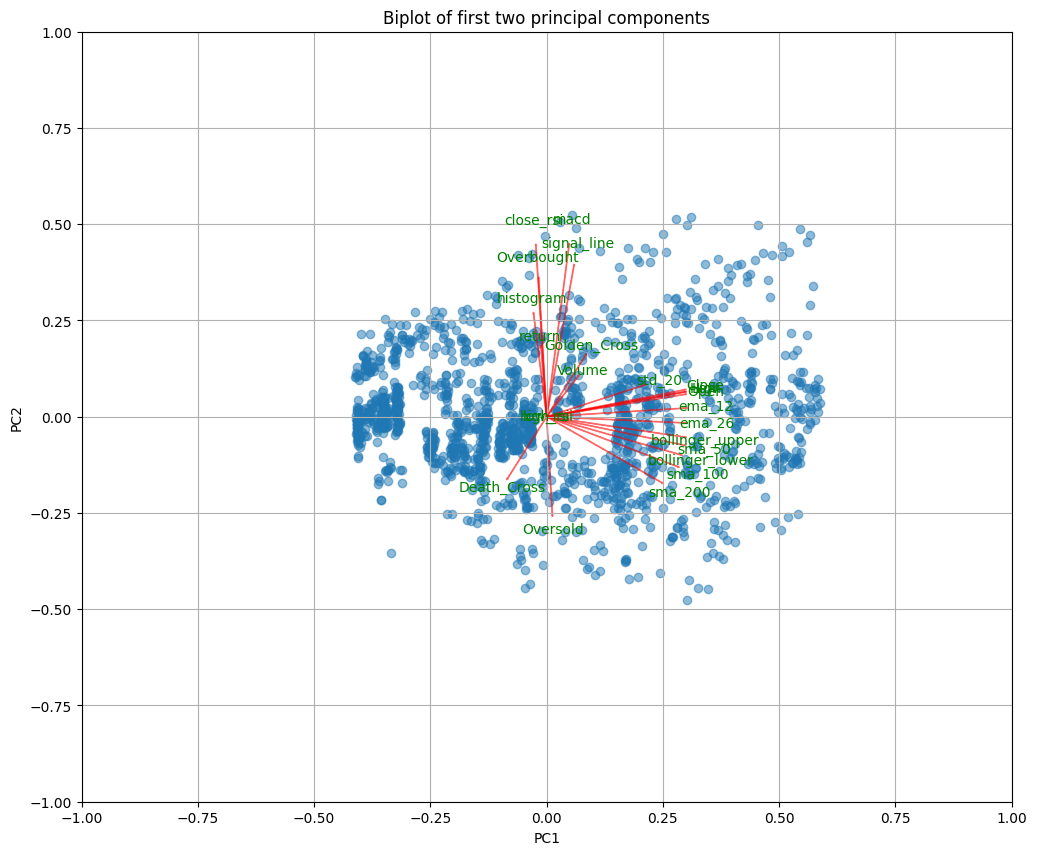

In [13]:
# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Create biplot
plt.figure(figsize=(12,10))
biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=features)
plt.title("Biplot of first two principal components")

The Biplot represent the results of PCA, here are my observation:

- Clustering: There are some clusters of observations, suggesting groupings for the given features, we can use k-means clustering to analysis next.
- Variable Relationship: Some variables appear to be highly correlated (e.g., "close" and "signal line"), while others seem to have opposing relationships (e.g., "Overbought" and "Oversold").
- Variable Importance: Based on arrow length, it appears that "macd" "sinal_line" and "close_rsi" might be relatively important features.

### Clustering Cryptocurrencies with K-means Clustering

We'll use K-means clustering method to group our cryptocurrencies to diffrent cluster, first we'll calculate the Silhouette Scores to determine the optimal number of clusters, the highest average silhouette score suggests the best number of clusters.

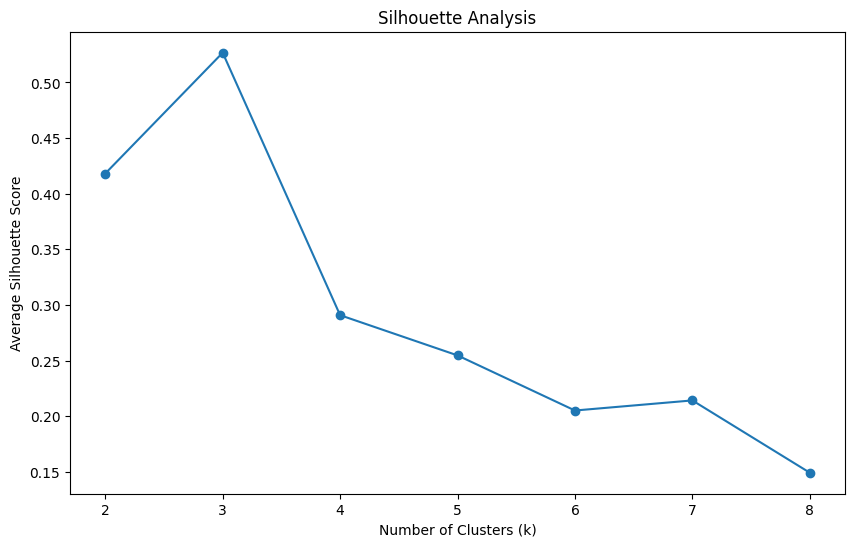

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.concat(crypto_df, ignore_index=True)
data.dropna(inplace=True)

# Renaming columns to its lowercase
data = data.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close','Volume':'volume'})

# Step 1: Aggregate data for each cryptocurrency
def aggregate_crypto_data(df):
    agg_dict = {
        'close': ['mean', 'std'],
        'volume': ['mean', 'std'],
        'close_rsi': 'mean',
        'high_rsi': 'mean',
        'low_rsi': 'mean',
        'sma_50': 'mean',
        'sma_200': 'mean',
        'std_20': 'mean',
        'macd': 'mean'
    }
    agg_df = df.groupby('Symbol').agg(agg_dict)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    
    # Calculate additional metrics
    agg_df['volatility'] = agg_df['close_std'] / agg_df['close_mean']
    agg_df['volume_intensity'] = agg_df['volume_mean'] / agg_df['close_mean']
    
    return agg_df

aggregated_data = aggregate_crypto_data(data)

# Step 2: Prepare data for clustering
features = [
    'close_mean', 'close_std', 'volume_mean', 'volume_std', 'close_rsi_mean',
    'high_rsi_mean', 'low_rsi_mean', 'sma_50_mean', 'sma_200_mean', 'std_20_mean',
    'macd_mean', 'volatility', 'volume_intensity'
]

X = aggregated_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step3: Calc silhouette score to determine clusters number
# Function to calculate average silhouette scores
def calculate_silhouette_scores(data):
    silhouette_scores = []
    for n in range(2, 9):
        kmeans = KMeans(n_clusters=n, init='k-means++', n_init='auto', random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Calculate silhouette scores
silhouette_scores = calculate_silhouette_scores(X_scaled)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

The silhouette scores figure suggest the highest score 3 is the best number of clusters, let's set n_clusters variable and clustering the dataset.

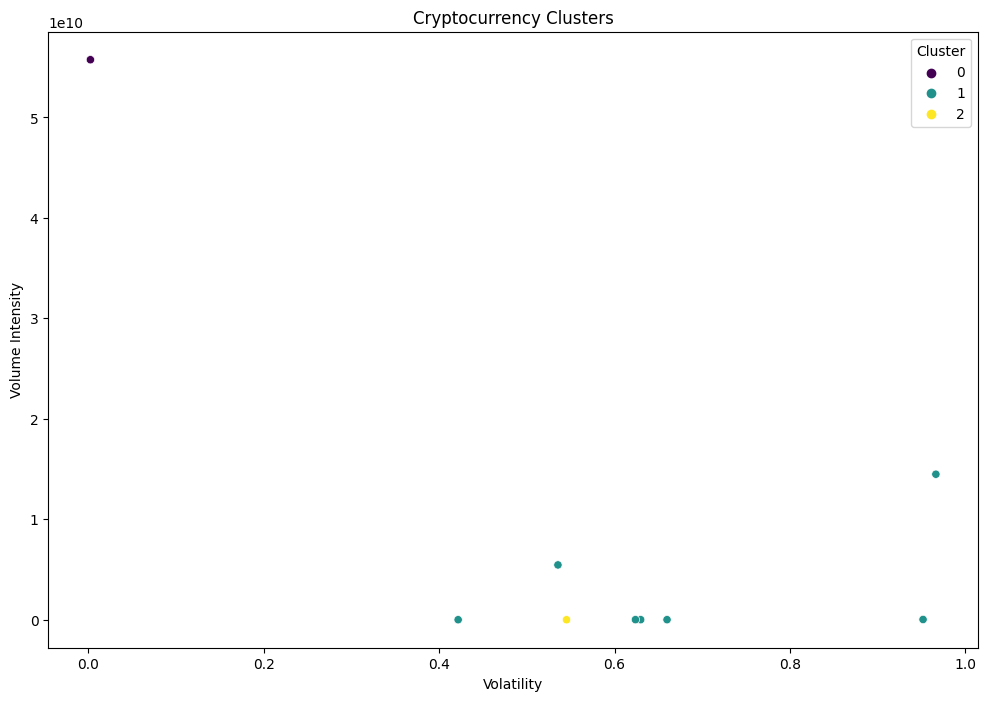


Cryptocurrencies in Cluster 0:
['USDT']

Cryptocurrencies in Cluster 1:
['BCH', 'BNB', 'DOGE', 'ETH', 'SOL', 'XMR', 'XRP']

Cryptocurrencies in Cluster 2:
['BTC']


In [15]:
# Step 4: Apply K-means clustering
n_clusters = 3  # Choose based on the silhouette scores
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the aggregated data
aggregated_data['Cluster'] = cluster_labels

# Step 5: Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=aggregated_data, x='volatility', y='volume_intensity', hue='Cluster', palette='viridis')
plt.title('Cryptocurrency Clusters')
plt.xlabel('Volatility')
plt.ylabel('Volume Intensity')
plt.show()

# Step 6: Analyze cluster characteristics
# Print cryptocurrencies in each cluster
for cluster in range(n_clusters):
    print(f"\nCryptocurrencies in Cluster {cluster}:")
    print(aggregated_data[aggregated_data['Cluster'] == cluster].index.tolist())

Based on above clustering results, we could observe that:

**Cluster 0: USDT**

- Stablecoin: USDT is a stablecoin pegged to the US dollar. This indicates that its price is relatively stable compared to other cryptocurrencies.
- Isolation: Being the sole member of Cluster 0 suggests it has distinct characteristics that differentiate it significantly from other coins.

**Cluster 1: BCH, BNB, DOGE, ETH, SOL, XMR, XRP**

- Diverse Group: This cluster includes a mix of large-cap and mid-cap cryptocurrencies with varying degrees of volatility.
- Potential Correlation: The presence of multiple cryptocurrencies in this cluster suggests potential correlations in price movements or other underlying factors.

**Cluster 2: BTC**

- Dominance: Bitcoin is the largest cryptocurrency by market capitalization.
- Unique Characteristics: Being the sole member of Cluster 2 indicates that its behavior is significantly different from other coins.

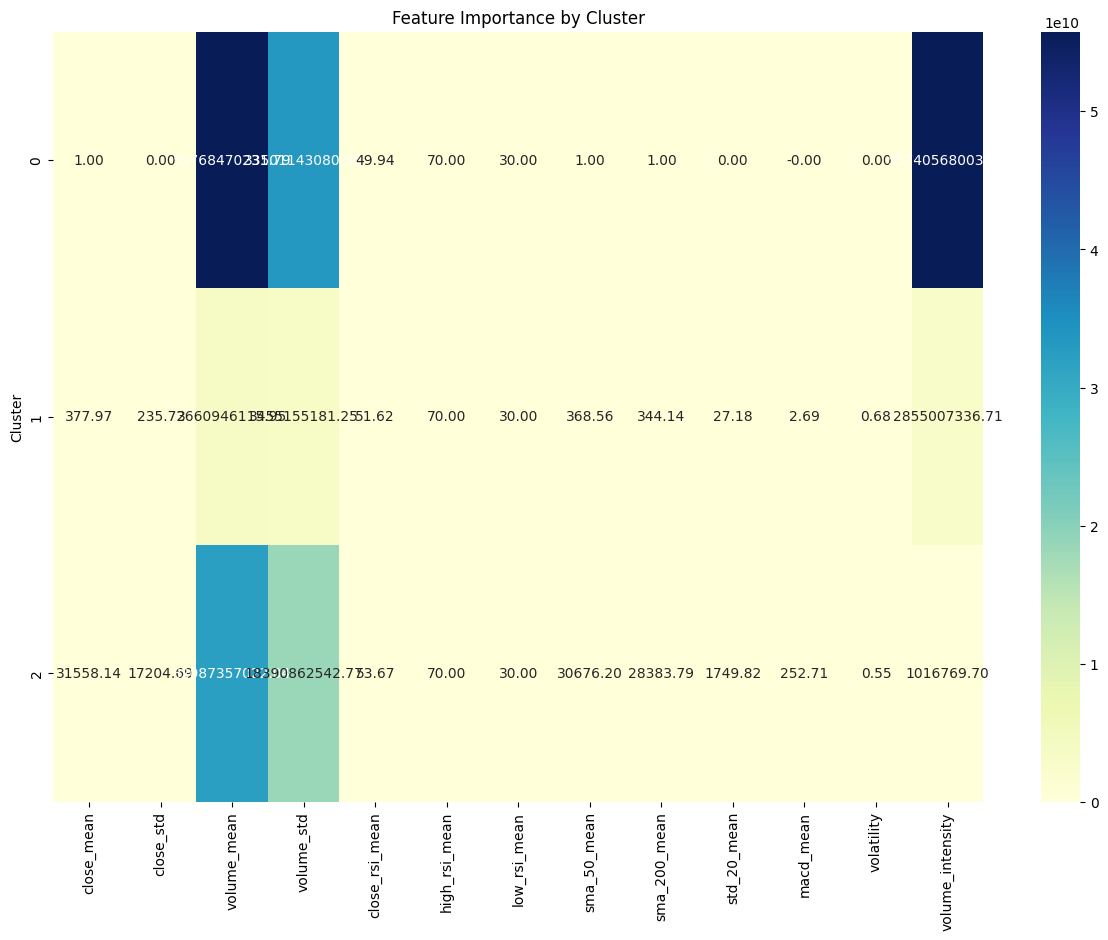

Cluster Means:
           close_mean     close_std   volume_mean    volume_std  \
Cluster                                                           
0            1.000501      0.002278  5.576847e+10  3.350114e+10   
1          377.971736    235.723227  3.660946e+09  3.455155e+09   
2        31558.136427  17204.689866  3.208736e+10  1.839086e+10   

         close_rsi_mean  high_rsi_mean  low_rsi_mean   sma_50_mean  \
Cluster                                                              
0             49.943209           70.0          30.0      1.000584   
1             51.619182           70.0          30.0    368.563697   
2             53.666983           70.0          30.0  30676.197552   

         sma_200_mean  std_20_mean   macd_mean  volatility  volume_intensity  
Cluster                                                                       
0            1.000747     0.001023   -0.000024    0.002277      5.574057e+10  
1          344.142956    27.175298    2.690204    0.684059   

In [16]:
# Step 7: Visualize feature importance for each cluster
cluster_means = aggregated_data.groupby('Cluster')[features].mean()
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Feature Importance by Cluster')
plt.show()
# Print means in each cluster
print("Cluster Means:")
print(cluster_means)

Based on above results, we could observe that for all the cryptocurrencies, the most important features are all related to the trading volume.

### Evaluate K-means Clustering Result with t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a great tool for visualizing high-dimensional data in a 2D or 3D space, which can be very helpful in evaluating clustering results. While t-SNE is not a clustering algorithm itself, it can be used to visualize how well the clusters separate in a lower-dimensional space.

Text(0.5, 1.0, 't-SNE visualization of cryptocurrency clusters')

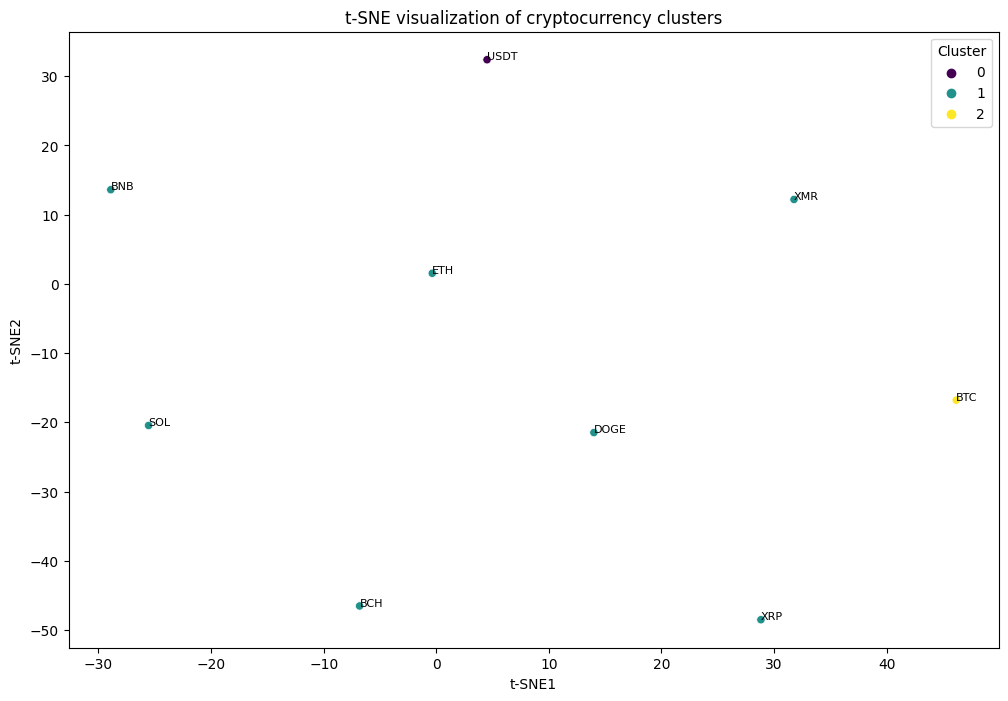

In [17]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=8, n_iter=1000)
tsne_results = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['Cluster'] = cluster_labels
tsne_df['Cryptocurrency'] = aggregated_data.index

# Visualize t-SNE results with cryptocurrency names
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='Cluster', palette='viridis', legend='full')
for i, txt in enumerate(tsne_df['Cryptocurrency']):
    plt.annotate(txt, (tsne_df['t-SNE1'].iloc[i], tsne_df['t-SNE2'].iloc[i]), fontsize=8)
plt.title('t-SNE visualization of cryptocurrency clusters')

In the t-SNE plot, we can see the clusters are clearly separated, this suggest the K-means clustering has found meaningful structure in the data.

Text(0.5, 1.0, 't-SNE visualization colored by volatility')

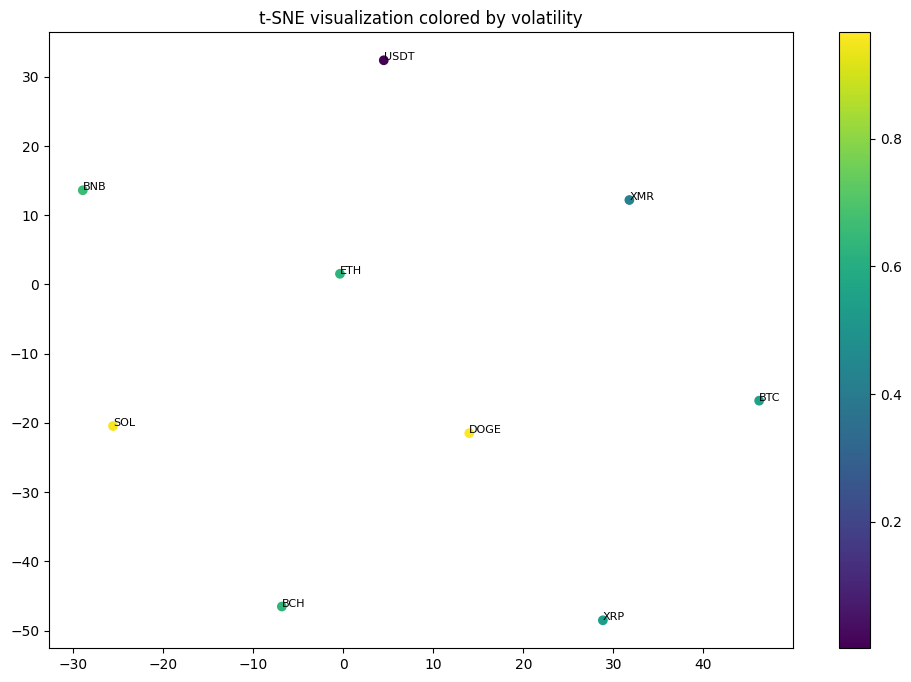

In [18]:
# Visualize the volatility feature relates to the clusters
feature_to_visualize = 'volatility'
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], 
                      c=aggregated_data[feature_to_visualize], cmap='viridis')
for i, txt in enumerate(tsne_df['Cryptocurrency']):
    plt.annotate(txt, (tsne_df['t-SNE1'].iloc[i], tsne_df['t-SNE2'].iloc[i]), fontsize=8)
plt.colorbar(scatter)
plt.title(f't-SNE visualization colored by {feature_to_visualize}')

We use the volatility feature to see it relates to the clusters, and the plot suggest for the DOGE and SOL, the volatility feature is more important factor to other coins.

## Conclusion

This project explored the potential of unsupervised learning algorithms, specifically PCA (Principal Component Analysis), t-SNE (t-Distributed Stochastic Neighbor Embedding) and K-means Clustering, for performing cryptocurrency market analysis. While the project contributes to the ongoing investigation of machine learning in financial analysis, the results highlight the challenges associated with this task.

We start using the PCA to reduce the dimensionality and identify the importance of features that extracted from feature engineering, the biplot shows there are some clusters of observations, suggesting groupings for the given features, then we picked important features from features importance results and apply to next clustering step.

Before doing the K-means clusterning, we aggregate the trading data for each cryptocurrency to create a set of features that represent each cryptocurrency's behavior, then we use the highest silhouette score to determine the best number of cluster and apply clustering to these feature sets, the clustering result help us identify groups of cryptocurrencies with similar trading characteristics, which could be useful for portfolio diversification, risk management, or developing trading strategies tailored to different types of cryptocurrencies.

And then we use the t-SNE to evaluate the K-means clustering result, while t-SNE itself is not a clustering algorithm itself, it can be used to visualize how well the clusters separete in a lower-dimensional spece. In the t-SNE plots, there are clear separetions between different clusters, this suggest the K-means clustering found meaningful structure in the data. We also see the gradient across the t-SNE visualization colored by volatility plot, this indicating the volatility feature is an important factor in the overall strcture of the data.

So far, we completed predicting the coin price with supervised learning methods and performing cryptocurrency market analysis with the unsupervised learning methods, I am looking forward to using deep learning methods to analyze the cryptocurrency market in the future.

